<a href="https://colab.research.google.com/github/JangGunWook/CrawlingStudy/blob/main/ex03_iris%EB%8D%B0%EC%9D%B4%ED%84%B0_%EB%8B%A4%EC%A4%91%EB%B6%84%EB%A5%98%EC%8B%A4%EC%8A%B5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
# tensorflow.keras > 뼈대구축
from tensorflow.keras import Sequential
# tnesorflow.keras.layers> 층 내용 정의
from tensorflow.keras.layers import Dense
# sklearn.model_selection > 훈련셋, 테스트셋 분리
from sklearn.model_selection import train_test_split
from keras.api._v2.keras import activations
from sklearn.datasets import load_iris

In [ ]:
iris = load_iris()
iris

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

In [ ]:
# key 값들 확인해보기
iris.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [ ]:
# 데이터 분리(문제와 답)
X = iris['data']
y = iris['target']
# 크기확인
print(X.shape, y.shape)

(150, 4) (150,)


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25,random_state=2)

#3. 크기 확인
print("문제데이터", X_train.shape, y_train.shape)
print("답 데이터", X_test.shape,y_test.shape)



문제데이터 (112, 4) (112,)
답 데이터 (38, 4) (38,)


In [ ]:
# 다중분류에서는 정답 데이터를 원핫 인코딩 해줘야한다!
# pd.get_dummies(대상) - > DataFrame
# to_categorical(대상) - > array
from tensorflow.keras.utils import to_categorical
y_train_oh = to_categorical(y_train)  # 훈련 답
y_test_oh = to_categorical(y_test)    # 테스트 답
y_train_oh

array([[0., 1., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 1., 0.],
       [1., 0

#### keras 인공신경망 생성!
- 1. 신경망 구조 설계
  - 뼈대 구축, 층 내용 정의
  - 출력층
    - 회귀 : units =1, activataion= 'linear'
    - 이진 : units =1, activataion= 'sigmoid'
    - 다중 : units =클래스만큼, activataion= 'softmax'
- 2. 학습/평가 방법 설정
  - 회귀 : 'mse'
  - 이진분류 : 'binary_crossentropy'
  - 다중분류 : 'categorical_crossentropy'
- 3. 학습 및 현황 시각화
- 4. 예측 및 평가

In [ ]:
model = Sequential()

In [ ]:
# 입력층
model.add(Dense(units=16, input_dim=4, activation="sigmoid"))

In [ ]:
# 중간층
model.add(Dense(units=10, input_dim=4, activation="sigmoid"))
model.add(Dense(units=20, input_dim=4, activation="sigmoid"))
model.add(Dense(units=30, input_dim=4, activation="sigmoid"))
model.add(Dense(units=40, input_dim=4, activation="sigmoid"))

In [ ]:
# 출력층(다중)
model.add(Dense(units = 3, activation="softmax"))

# 정보요약
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_25 (Dense)            (None, 16)                80        
                                                                 
 dense_26 (Dense)            (None, 10)                170       
                                                                 
 dense_27 (Dense)            (None, 20)                220       
                                                                 
 dense_28 (Dense)            (None, 30)                630       
                                                                 
 dense_29 (Dense)            (None, 40)                1240      
                                                                 
 dense_30 (Dense)            (None, 3)                 123       
                                                                 
Total params: 2463 (9.62 KB)
Trainable params: 2463 (9

In [ ]:
# 학습/ 평가 방법 설정
# loss, optimizer, metrics-정확도
# 다중분류
model.compile(loss = 'categorical_crossentropy',
                     optimizer='adam',
                     metrics = ['accuracy'])

In [ ]:
# 3. 학습(반복횟수)
h = model.fit(X_train,y_train_oh,epochs=200)


Epoch 1/200
4/4 [==============================] - 1s 4ms/step - loss: 1.2852 - accuracy: 0.3036
Epoch 2/200
4/4 [==============================] - 0s 3ms/step - loss: 1.2231 - accuracy: 0.3036
Epoch 3/200
4/4 [==============================] - 0s 5ms/step - loss: 1.1759 - accuracy: 0.3036
Epoch 4/200
4/4 [==============================] - 0s 4ms/step - loss: 1.1329 - accuracy: 0.2768
Epoch 5/200
4/4 [==============================] - 0s 4ms/step - loss: 1.1096 - accuracy: 0.3482
Epoch 6/200
4/4 [==============================] - 0s 4ms/step - loss: 1.1027 - accuracy: 0.3482
Epoch 7/200
4/4 [==============================] - 0s 4ms/step - loss: 1.0962 - accuracy: 0.4196
Epoch 8/200
4/4 [==============================] - 0s 3ms/step - loss: 1.0974 - accuracy: 0.3482
Epoch 9/200
4/4 [==============================] - 0s 3ms/step - loss: 1.0989 - accuracy: 0.3482
Epoch 10/200
4/4 [==============================] - 0s 4ms/step - loss: 1.0998 - accuracy: 0.3482
Epoch 11/200
4/4 [===========

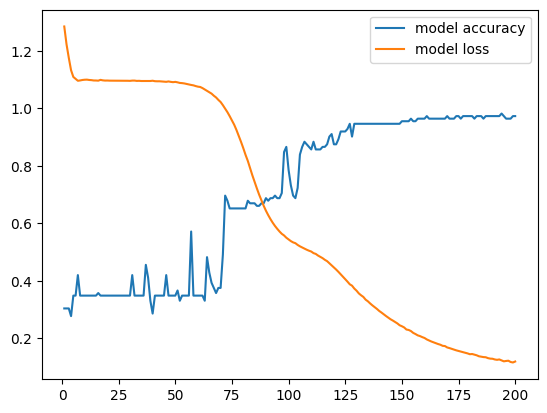

In [ ]:
loss = h.history['loss']
accuracy = h.history['accuracy']

plt.plot(range(1,201), accuracy,label="model accuracy") # x 반복 횟수(300), y loss(300개)
plt.plot(range(1,201), loss,label="model loss") # x 반복 횟수(300), y loss(300개)

plt.legend() # 범례 출력
plt.show()

# 반복이 조금만 진행되는 w,b 찾아가면서 성능 빠르게 개선
# optimizer 문제가 있음
# activation에 문제가 있음